# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Aluno**: Eduardo Garcia do Nascimento

**RA/CPF**: 22008732800


---
### Carregamento dos dados

Nesta seção é feita a carga dos atributos em um dataframe só, ou seja, os três datasets são lidos e concatenados para que a redução de atributos leve em conta o que existe de melhor em todos eles.


In [1]:
# -*- coding: utf-8 -*-

# Caminho dos arquivos
FILES_DIRECTORY = "data"

import numpy as np 
import pandas as pd 
import os
from scripts import utils

if __name__ == '__main__':
                       
    # importa o arquivo e guarda em um dataframe do Pandas
    set1_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'set1.csv'), sep=',', low_memory=False)
    set2_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'set2.csv'), sep=',', low_memory=False) 
    set3_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'set3.csv'), sep=',', low_memory=False)
    train_dataset = pd.read_csv(os.path.join(FILES_DIRECTORY, 'train.csv'), sep=',')
    test_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'test.csv'), sep=',')
    
    # Renomeia colunas concatenando o setX antes de fazer o merge para identificá-las posteriormente
    cols = set1_dataset.columns
    for col in cols:
        set1_dataset = set1_dataset.rename(columns={col:'set1_'+col})
        
    cols = set2_dataset.columns
    for col in cols:
        set2_dataset = set2_dataset.rename(columns={col:'set2_'+col})
    
    cols = set3_dataset.columns
    for col in cols:
        set3_dataset = set3_dataset.rename(columns={col:'set3_'+col})

    # Concatena os datasets em somente um dataset único
    frames = [ set1_dataset, set2_dataset, set3_dataset ]
    input_dataset = pd.concat(frames, axis=1)
    
    print('A base de dados inicial combinada tem %d amostras com %d atributos.' % (input_dataset.shape[0],
                                                                                 input_dataset.shape[1]))
    
        
   
    utils.beep(1, 400)

A base de dados inicial combinada tem 60842 amostras com 309 atributos.


---
### Pré-processamento e seleção de atributos

Nesta seção são feitas limpezas da base de dados como:

* Remoção de atributos sem variância;
* Tratamento de outliers e dados nulos;
* Seleção dos atributos que terão maior valor para o algoritmo de classificação.

In [2]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

# Remove os atributos que são constantes e não oferecem nenhum valor aos algoritmos de classificação
variance_mask = VarianceThreshold().fit(input_dataset).get_support()
input_dataset = input_dataset.iloc[:,variance_mask]
print('Atributos removidos por baixa variância: %d' % np.sum(~variance_mask))

# Tratamento de outliers e entradas nulas
df = input_dataset.copy()
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
print("Número de outliers substituídos por valores nulos:", np.sum(np.sum(outliers_mask)))
df[outliers_mask] = np.nan
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
input_dataset.loc[:,:] = imp_mean.fit_transform(input_dataset)

# Normalização dos dados entre 0 e 1
input_dataset.loc[:,:] = MinMaxScaler().fit_transform(input_dataset)

# Adiciona as classes junto ao dataset de atributos para fazer a seleção de atributos
input_dataset['classe'] = np.nan
input_dataset.loc[train_dataset['Id'].values,'classe'] = train_dataset['Class'].values

# Salva uma cópia do dataset completo que será usada para predição de novas amostras.
backup_dataset = input_dataset.copy()

feature_cols = list(input_dataset.columns)
feature_cols.remove('classe')

# Seleciona os melhores atritubos para treinametno do algoritmo de classificação
print('Selecionando melhores features....................................')
selector = SelectKBest(f_classif, k=20).fit(
    input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1), feature_cols].values,
    input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1),'classe'].values)
features_mask = selector.get_support()
features_mask = np.append(features_mask, True)
input_dataset = input_dataset.iloc[:,features_mask]

print('\n\n\n\nBreve avaliação das primeiras amostras')
display(input_dataset.head(10))

print('Avaliação do descritivo do dataset que permite ter uma ideia mais realista dos dados')
display(input_dataset.describe())

utils.beep(1, 500)

Atributos removidos por baixa variância: 6
Número de outliers substituídos por valores nulos: 1485512
Selecionando melhores features....................................




Breve avaliação das primeiras amostras


,set2_D0015,set2_D0016,set2_D0017,set2_D0039,set2_D0040,set2_D0041,set2_D0064,set2_D0076,set2_D0078,set2_D0086,...,set3_D0021,set3_D0022,set3_D0028,set3_D0030,set3_D0031,set3_D0032,set3_D0033,set3_D0118,set3_D0119,classe
0,0.034247,0.061644,0.102740,0.034247,0.061644,0.102740,0.087248,0.000397,0.004443,0.000070,...,0.919080,0.928441,0.777472,0.809993,0.809993,0.643518,0.685781,0.996289,0.993571,NaN
1,0.206897,0.275862,0.379310,0.134454,0.201681,0.235294,0.172351,0.003951,0.011435,0.000522,...,0.937570,0.938647,0.752960,0.810898,0.810225,0.618624,0.681894,0.995425,0.992865,NaN
2,0.079755,0.171779,0.202454,0.079755,0.171779,0.202454,0.133834,0.007563,0.006715,0.000104,...,0.937349,0.946896,0.764942,0.810013,0.810013,0.624315,0.668855,0.994724,0.991626,NaN
3,0.083333,0.166667,0.166667,0.077586,0.133621,0.189655,0.157597,0.000256,0.011574,0.000790,...,0.881255,0.929880,0.793095,0.809994,0.809989,0.634784,0.690639,0.997281,0.994195,NaN
4,0.124000,0.236000,0.304000,0.124000,0.236000,0.304000,0.123210,0.002793,0.004427,0.000154,...,0.915851,0.925179,0.928401,0.914191,0.914191,0.750575,0.780145,0.996491,0.993701,NaN
5,0.038194,0.100694,0.138889,0.069414,0.134490,0.180043,0.091399,0.001829,0.002868,0.000202,...,0.830931,0.881138,0.869200,0.810019,0.810020,0.643434,0.697006,0.998937,0.992846,NaN
6,0.138462,0.192308,0.238462,0.055351,0.095941,0.217712,0.175006,0.000407,0.002409,0.000344,...,0.870017,0.891666,0.851628,0.809984,0.809985,0.633500,0.678901,0.997140,0.993963,NaN
7,0.135560,0.194499,0.264244,0.135560,0.194499,0.264244,0.171572,0.001937,0.008179,0.000102,...,0.901127,0.910305,0.872269,0.834905,0.834905,0.651242,0.692589,0.996727,0.992488,NaN
8,0.000000,0.076923,0.076923,0.000000,0.076923,0.076923,0.165877,0.007907,0.008370,0.001088,...,0.919322,0.928685,0.749446,0.810030,0.810030,0.636076,0.679221,0.978740,0.967196,NaN
9,0.076389,0.118056,0.159722,0.076389,0.118056,0.159722,0.126872,0.002067,0.002006,0.000046,...,0.917743,0.927090,0.782246,0.810326,0.810326,0.622882,0.667591,0.996298,0.993326,NaN


Avaliação do descritivo do dataset que permite ter uma ideia mais realista dos dados


,set2_D0015,set2_D0016,set2_D0017,set2_D0039,set2_D0040,set2_D0041,set2_D0064,set2_D0076,set2_D0078,set2_D0086,...,set3_D0021,set3_D0022,set3_D0028,set3_D0030,set3_D0031,set3_D0032,set3_D0033,set3_D0118,set3_D0119,classe
count,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,...,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,4564.000000
mean,0.077119,0.133466,0.192005,0.075154,0.131185,0.189620,0.125446,0.004826,0.009187,0.000968,...,0.754098,0.731812,0.790356,0.819833,0.818717,0.629680,0.679997,0.991490,0.987749,-0.825153
std,0.072609,0.093063,0.108784,0.067977,0.088012,0.102001,0.072545,0.028539,0.030350,0.010140,...,0.346810,0.370996,0.054433,0.033289,0.032303,0.080392,0.057838,0.011672,0.013029,0.513349
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.039773,0.085492,0.140271,0.039735,0.084746,0.139292,0.087766,0.000160,0.000836,0.000015,...,0.883061,0.879055,0.756496,0.810009,0.810007,0.624195,0.670595,0.991494,0.987019,-1.000000
50%,0.064309,0.121164,0.182006,0.062937,0.118750,0.180124,0.115575,0.001059,0.003076,0.000060,...,0.911545,0.917798,0.779354,0.810210,0.810119,0.633760,0.680102,0.995189,0.992217,-1.000000
75%,0.095890,0.166667,0.232759,0.093023,0.161905,0.228669,0.149644,0.003044,0.007056,0.000165,...,0.924590,0.931206,0.814413,0.814914,0.813696,0.646407,0.692817,0.996796,0.994121,-1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---
### Análise exploratória

Nesta seção são exibidas informações do resultado após os dados serem pré-processados e os atributos selecionados. Dentre as ferramentas para análise exploratória que serão utilizados estão:

* Descritivo resumido da base.
* Análises de covariância e correlação.
* Matriz de disperação entre todos os atributos selecionados. 
* Diagramas de violino para visualização dos quartis e outliers como uma variação aos diagramas de caixa.
* Gráfico de dispersão com a dimensionalidade reduzida a somente 2 atributos.

Análise e visualização dos dados:
Número de posts comuns: 4038
Número de posts não reconhecidos (podem ser phishing ou não): 272
Número de posts phishing: 254


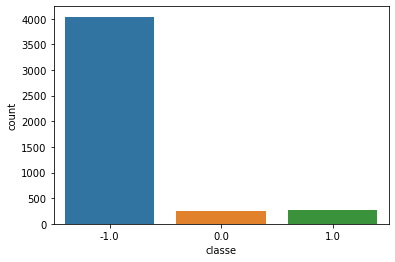

Análise das matrizes de covariância 


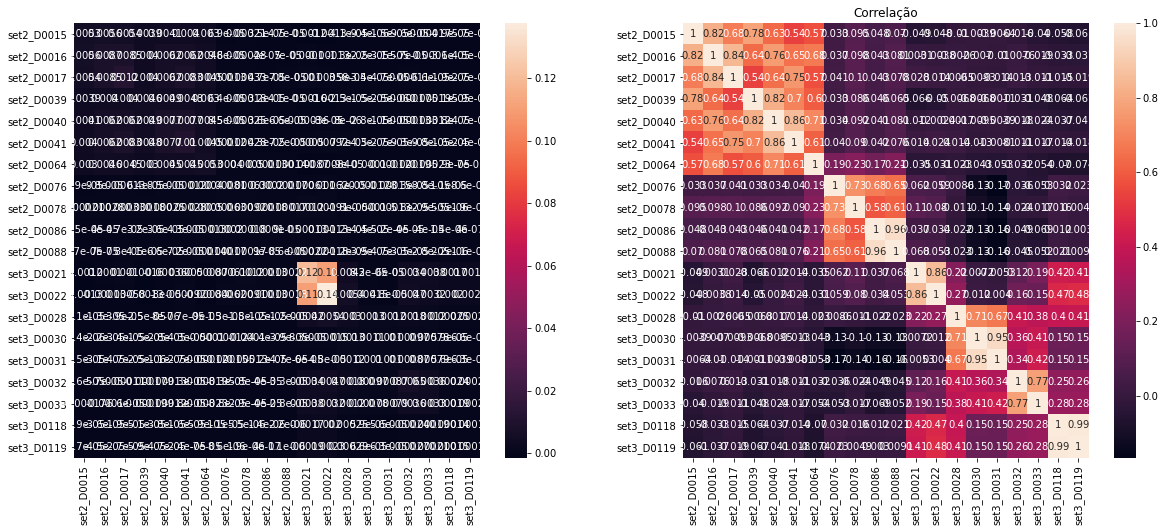

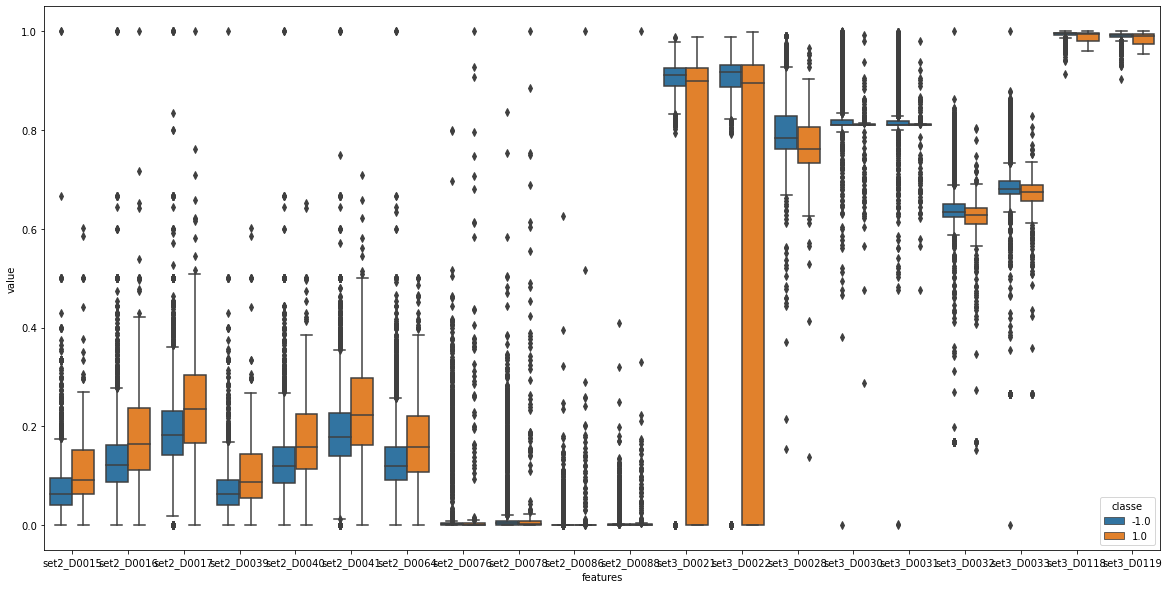

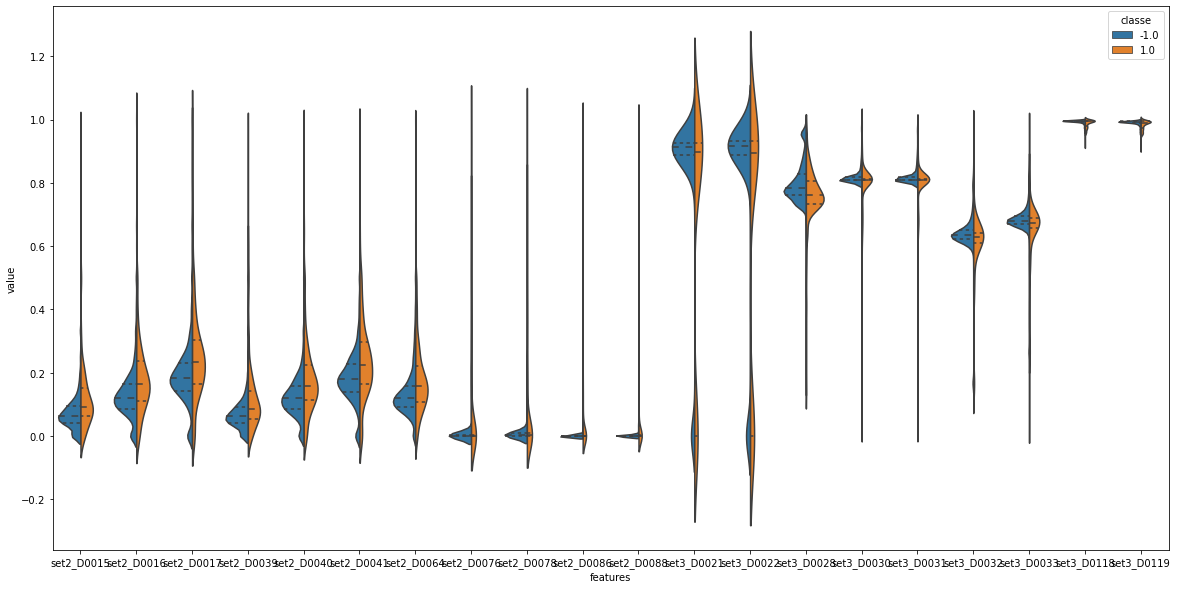

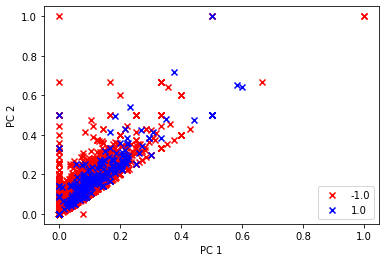

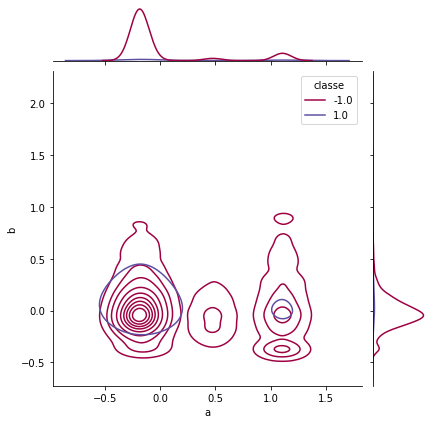

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from scripts import analise_exploratoria

# Análise do balanceamento das classes
print('Análise e visualização dos dados:')
ax = sns.countplot(x='classe', data=input_dataset, label="Contagem")

N,U,P = input_dataset.classe.value_counts()
print('Número de posts comuns:', N)
print('Número de posts não reconhecidos (podem ser phishing ou não):', U)
print('Número de posts phishing:', P)
plt.show()

# Análise da matriz scatter pra que entendamos a relação entre os atributos
#print('Análise da matriz de dispersão')
#sns.pairplot(input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)], hue='classe', height=3.5);
#plt.show()

# matrizes de covariancia e correlação
print('Análise das matrizes de covariância ')
df_covariance = input_dataset.iloc[:,:-1].cov()
df_correlation = input_dataset.iloc[:,:-1].corr()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8))
plt.title('Covariância')
sns.heatmap(df_covariance, annot=True, xticklabels=df_correlation.columns, yticklabels=df_correlation.columns, ax=ax1)
plt.title('Correlação')
sns.heatmap(df_correlation, annot=True, xticklabels=df_correlation.columns, yticklabels=df_correlation.columns, ax=ax2)
plt.show()

# Montagem do dataset de teste para envio para o Kaggle
K = input_dataset.loc[test_dataset.iloc[:,:].values.T[0]]
K = K.drop('classe', axis=1).values

# Diagramas de caixa
plt.figure(figsize=(20,10))
data = pd.melt(input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)],
               id_vars="classe", var_name="features", value_name='value')
sns.boxplot(x='features', y='value', hue='classe', data=data)
plt.show()

# Diagramas de violino
plt.figure(figsize=(20,10))
sns.violinplot(x='features', y='value', hue='classe', data=data, split=True, inner="quartile")
plt.show()

# Separação de atributos e classe para 
analise_exploratoria.printPCA(input_dataset.loc[((input_dataset['classe'] == -1) | (input_dataset['classe'] == 1))].drop('classe', axis=1).values,
               input_dataset.loc[((input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)), 'classe'].values)    

analise_exploratoria.printJointPlot(input_dataset.loc[((input_dataset['classe'] == -1) | (input_dataset['classe'] == 1))].drop('classe', axis=1).values,
               input_dataset.loc[((input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)), 'classe'].values)    

utils.beep(1, 600)   

---
### Preparo dos dados e experimentos para encontrar os melhores hiperparâmetros

Nesta seção os dados são separados em duas partes: treino e testes. Esta estratégia foi utilizada para posterior comparação com a validação de modelos utilizandos K-folds.
Para encontrar os melhores hiperparâmetros foi utilizada a classe GridSearchCV e devido o seu alto custo computacional e não existência da necessidade de executá-las sempre, a sua chamada é condicionada às variáveis booleanas evaluate_svm_hiperparameters, evaluate_rfc_hiperparameters e evaluate_lrc_hiperparameters serem verdadeiras.

In [4]:
from sklearn.model_selection import train_test_split
from scripts import preprocessamento
from scripts import experimentos
from scripts import utils

X_total = input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)].drop('classe', axis=1).values
y_total = input_dataset.loc[((input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)), 'classe'].values

# Utilize as flags abaixo somente para avaliação dos hiperparâmetros pois elas demoram muito pra serem executadas
evaluate_svm_hiperparameters = False # Busca os melhores parâmetros para as máquinas de vetores de suporte
evaluate_rfc_hiperparameters = False # Busca os melhores parâmetros para as florestas aleatórias
evaluate_knn_hiperparameters = False # Busca os melhores parâmetros para o KNN

print('Removendo amostras outliers')
X, y = preprocessamento.remove_outliers(X_total, y_total)

print(X.shape, y.shape)
print('Separando a base em treino e teste')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

scores = ['balanced_accuracy', 'f1', 'roc_auc']

if evaluate_svm_hiperparameters == True:
    experimentos.find_best_svm(X,y, scores)
    
if evaluate_rfc_hiperparameters == True:    
    experimentos.find_best_rfc(X, y, scores)
        
if evaluate_knn_hiperparameters == True:
    experimentos.find_best_knn(X, y, scores)

utils.beep(1, 700)

Removendo amostras outliers
Amostras positivas (phishing) mantidas: 229 de 272
Percentual de outliers removidos: 15.8%
Amostras negativas (HAM) mantidas: 3410 de 4038
Percentual de outliers removidos: 15.6%
(3639, 20) (3639,)
Separando a base em treino e teste


---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais ensinados no curso e executando os métodos inteligentes

In [5]:
# Importa os classificadores usados nesse trabalho
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm

from scripts import experimentos
from scripts import preprocessamento


collect_more_samples = True
collect_more_samples_again = False

X_bal, y_bal = X, y
X_train_bal, y_train_bal = X_train, y_train

scoring=['roc_auc', 'f1', 'f1_micro', 'f1_macro', 'f1_weighted', 'accuracy', 'balanced_accuracy', 'precision', 'recall']

results = pd.DataFrame()

model_list = [
    ['SVM poly', svm.SVC(kernel='poly', class_weight='balanced', decision_function_shape='ovr', probability=True,random_state=1), 0],
 #   ['SVM linear', svm.SVC(kernel='linear', C=100, class_weight='balanced', decision_function_shape='ovr', probability=True,random_state=1), 0],
 #   ['SVM rbf', svm.SVC(kernel='rbf', C=1000, gamma=0.0001, class_weight='balanced', decision_function_shape='ovr', probability=True,random_state=1), 0],
 #   ['SVM rbf_ra', svm.SVC(kernel='rbf', C=10, gamma='scale', class_weight='balanced', decision_function_shape='ovr', probability=True,random_state=1), 0],
 #   ['SVM rbf_ba', svm.SVC(kernel='rbf', C=400, gamma='scale', class_weight='balanced', decision_function_shape='ovr', probability=True,random_state=1), 0],
 #   ['SVM rbf_f1', svm.SVC(kernel='rbf', C=600, gamma=0.001, class_weight='balanced', decision_function_shape='ovr', probability=True,random_state=1), 0],
    ['Random Forest', RandomForestClassifier(max_depth=2, class_weight='balanced', random_state=1), 0],
    ['Logistic Regression', LogisticRegression(random_state=1, class_weight='balanced', max_iter=15000), 0],
 #   ['Multinomial NB', MultinomialNB(), 0],
    ['KNN', KNeighborsClassifier(n_neighbors=1, leaf_size=4, weights='distance'), 0],
    ['AdaBoost', AdaBoostClassifier(n_estimators=100, random_state=0), 0],
 #   ['GradBoost', GradientBoostingClassifier(random_state=0), 0],
 #   ['KNN3', KNeighborsClassifier(n_neighbors=1, leaf_size=4, weights='distance'), 0],
 #   ['KNN8', KNeighborsClassifier(n_neighbors=70, leaf_size=1, weights='distance'), 0],
]

# Pré balanceamento dos dados utilizando a técnica de oversampling
X_train_bal, y_train_bal = preprocessamento.oversample(X_train_bal, y_train_bal)
X_bal, y_bal = preprocessamento.oversample(X, y)

semi_model = svm.SVC(kernel='poly', class_weight='balanced', decision_function_shape='ovr', probability=True,random_state=1)
# População dos dados não classificados com o melhor classificador encontrado com os resultados mais confiáveis
if collect_more_samples == True:
    samples_mask = (backup_dataset.classe!=-1)&(backup_dataset.classe!=1)&(backup_dataset.classe!=0)
    samples = backup_dataset[samples_mask].iloc[:,features_mask].drop('classe', axis=1).values
    X_semi, y_semi, proba_mask = preprocessamento.add_samples(semi_model, X_bal, y_bal, samples)

    print('Número de amostras acrescentadas ao dataset de treinamento:', X_semi.shape[0], 
                                                                          np.sum(y_semi==-1), np.sum(y_semi==1))
    X_train_bal = np.concatenate([X_train_bal, X_semi], axis=0)
    y_train_bal = np.concatenate([y_train_bal, y_semi], axis=0)
    X_bal = np.concatenate([X_bal, X_semi], axis=0)
    y_bal = np.concatenate([y_bal, y_semi], axis=0)

if collect_more_samples_again == True:
    X_train_bal, y_train_bal = preprocessamento.oversample(X_train_bal, y_train_bal)
    X_bal, y_bal = preprocessamento.oversample(X_bal, y_bal)

    # População dos dados não classificados com o melhor classificador encontrado com os resultados mais confiáveis
    samples = samples[~proba_mask]
    X_semi, y_semi, proba_mask = preprocessamento.add_samples(semi_model, X_train_bal, y_train_bal, samples)
    print('Número de amostras acrescentadas ao dataset de treinamento:', X_semi.shape[0], 
                                                                          np.sum(y_semi==-1), np.sum(y_semi==1))
    X_train_bal = np.concatenate([X_train_bal, X_semi], axis=0)
    y_train_bal = np.concatenate([y_train_bal, y_semi], axis=0)
    X_bal = np.concatenate([X_bal, X_semi], axis=0)
    y_bal = np.concatenate([y_bal, y_semi], axis=0)

X_train_bal, y_train_bal = preprocessamento.oversample(X_train_bal, y_train_bal)
X_bal, y_bal = preprocessamento.oversample(X_bal, y_bal)

for model in model_list:
    print(model[0] + '------------------------------------------------------------------------------------')
    scores = experimentos.evaluate_model(model[1], X_train_bal, y_train_bal, X_test, y_test)

    for score in scores:
        results.loc[model[0], score] = np.mean(scores[score])
    


utils.beep(1, 800)

Balaceamento antes da SOBREamostragem 2387 160
Balaceamento após da SOBREamostragem 2387 2387
Balaceamento antes da SOBREamostragem 3410 229
Balaceamento após da SOBREamostragem 3410 3410
Número de amostras acrescentadas ao dataset de treinamento: 11400 4291 7109
Balaceamento antes da SOBREamostragem 6678 9496
Balaceamento após da SOBREamostragem 9496 9496
Balaceamento antes da SOBREamostragem 7701 10519
Balaceamento após da SOBREamostragem 10519 10519
SVM poly------------------------------------------------------------------------------------
Random Forest------------------------------------------------------------------------------------
Logistic Regression------------------------------------------------------------------------------------
KNN------------------------------------------------------------------------------------
AdaBoost------------------------------------------------------------------------------------


---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos e comparados, através de tabelas e gráficos

,bal_accuracy_train,bal_accuracy_test,f1_weighted,f1_micro,precision_micro,recall_micro,mcc,roc_auc,TP,TN,train_time,predict_time
SVM poly,0.924600,0.774109,0.883770,0.855311,0.855311,0.855311,0.357114,0.832922,887.000000,47.000000,13.163270,0.067657
Random Forest,0.896114,0.722321,0.868246,0.834249,0.834249,0.834249,0.283031,0.775093,870.000000,41.000000,0.776103,0.009777
Logistic Regression,0.914912,0.764248,0.863008,0.824176,0.824176,0.824176,0.321126,0.816574,852.000000,48.000000,0.331900,0.000221
KNN,0.999473,0.714841,0.891476,0.870879,0.870879,0.870879,0.307177,0.714841,914.000000,37.000000,0.071943,0.160400
AdaBoost,0.938658,0.751881,0.880584,0.851648,0.851648,0.851648,0.329601,0.830372,886.000000,44.000000,2.661613,0.021426


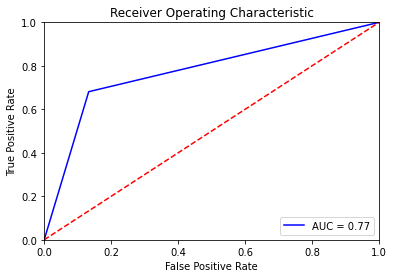

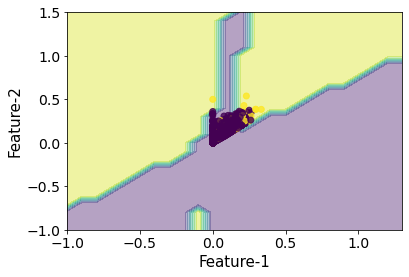

In [6]:
from scripts import analise_resultados

submit_preference_score = 'SVM poly'

for model in model_list:
    if model[0]==submit_preference_score:
        best_model = model[1]


def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    
    return ['background-color: yellow' if v else '' for v in is_max]

results_highlited = results.style.apply(highlight_max)
display(results_highlited)

y_pred = best_model.predict(X_test)
analise_resultados.print_rocauc_curve(y_test, y_pred)
analise_resultados.plot_decision_boundaries(X_train, y_train, svm.SVC, kernel='poly', class_weight='balanced', decision_function_shape='ovr', probability=True,random_state=1)


utils.beep(3, 1000)

---
### Criação do arquivo de sumissão no Kaggle

Na etapa final, o arquivo submission.csv é criado para ser enviado ao Kaggle de acordo com os padrões pré-definidos pela proposta do desafio.

In [7]:
submit_preference_score = 'SVM poly'

for model in model_list:
    if model[0]==submit_preference_score:
        best_model = model[1]

print('Criando arquivo de submissão para o modelo: ' + submit_preference_score)    
    
print('Imprimindo arquivo submission.csv ...')
clf= best_model.fit(X_bal, y_bal)
y_pred_submission = clf.predict_proba(K)[:,1]
result = np.zeros((K.shape[0],2))
for i in range(K.shape[0]):
    result[i][0] = test_dataset.iloc[:,:].values.T[0][i]
    result[i][1] = y_pred_submission[i]
resultdf = pd.DataFrame(data=result, columns=["Id", "Predicted"])
resultdf['Id'] = resultdf['Id'].astype(int)
resultdf['Predicted'] = resultdf['Predicted'].round(decimals=5)
resultdf.to_csv('submission.csv', index=False, float_format='%.5f')
print('####################################################################################################')

utils.beep(5, 200)

Criando arquivo de submissão para o modelo: SVM poly
Imprimindo arquivo submission.csv ...
####################################################################################################
